# Midterm exams

This is a "closed book" examination - in particular, you are not to use any resources outside of this notebook (except possibly pen and paper). You may consult help from within the notebook using ? but not any online references. You should turn wireless off or set your laptop in "Airplane" mode prior to taking the exam. 

You have 2 hours to complete the exam.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext rpy2.ipython

**Q1 (10 points)**. 

1. Read the `data/iris.csv` data set into a Pandas DataFrame. Dispaly the first 4 lines of the DataFrame. (2 points)
2. Create a new DataFrame showing the mean `SepalLength`, `SepalWidth`, `PetalLength` and `PetalWidth` for the 3 different types of irises. (4 points)
3. Make a scatter plot of `SepalLength` against `PetalLength` where each species is assigned a different color. (4 points)

In [3]:
df = pd.read_csv('data/iris.csv')
df.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [4]:
df.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


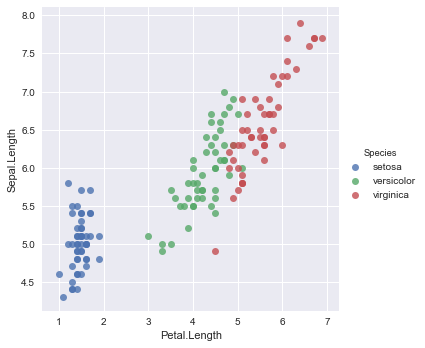

In [5]:
sns.lmplot(x='Petal.Length', y='Sepal.Length', hue='Species', data=df, fit_reg=False)
pass

**Q2 (10 points)**

Write a function `peek(df, n)` to display a random selection of $n$ rows of any dataframe (without repetition). Use it to show 5 random rows from the iris data set. The function should take as inputs a dataframe and an integer. Do not use the `pandas sample` method.

In [6]:
def peek(df, n):
    """Display a random selection of n rows of datafraem df."""
    if df.shape[0] < n:
        return df
    idx = np.random.choice(df.shape[0], n)
    return df.iloc[idx]

In [7]:
peek(df, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
131,7.9,3.8,6.4,2.0,virginica
10,5.4,3.7,1.5,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
66,5.6,3.0,4.5,1.5,versicolor


**Q3 (10 points)** 

Write a function that when given $m$ vectors of length $k$ and another $n$ vectors of length $k$, returns an $m \times n$ matrix of the cosine distance between each pair of vectors. Take the cosine distance to be 
$$
\frac{A \cdot B}{\|A\} \|B\|}
$$
for any two vectors $A$ and $B$.  

Do not use the `scipy.spatial.distance.cosine` function or any functions from `np.linalg` or `scipy.llnalg`.

In [8]:
import numpy as np

In [9]:
def norm(A):
    return np.sqrt(np.sum(A**2))

def cosine_distance(A, B):
    """Cosine distance."""
    return (A @ B)/(norm(A)*norm(B))

In [34]:
A = np.array([1,2,3,4])
B = np.array([2,3,1,4])
cosine_distance(A, B)

0.90000000000000002

In [38]:
def cosine_distance_matrix(M, N):
    """Cosine distance between each pair of vectors in M and N."""
    m = len(M)
    n = len(N)
    res = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            res[i, j] = cosine_distance(M[i], N[j])
    return res

In [36]:
M = [A, B]
cosine_distance_matrix(M, M)

<< [1 2 3 4] [1 2 3 4]
<< [1 2 3 4] [2 3 1 4]
<< [2 3 1 4] [1 2 3 4]
<< [2 3 1 4] [2 3 1 4]


array([[ 1. ,  0.9],
       [ 0.9,  1. ]])

**Q4 (10 points)**

Consider the following matrix $A$ with dimensions (4,6), to be interpreted as 4 rows of the measurements of 6 features.
```python
np.array([[5, 5, 2, 6, 2, 0],
          [8, 6, 7, 8, 9, 7],
          [9, 5, 0, 4, 6, 8],
          [8, 7, 9, 3, 6, 1]])
```

1. Add 1 to the first row, 2 to the second row, 3 to the third row and 4 to the fourth row using a vector `v = np.array([1,2,3,4])` and broadcasting. (2 points)
2. Normalize A so that its row means are all 0 and call it A1. (2 points)
3. What are the singular values of A1? (2 points)
4. What are the eigenvalues of the covariance matrix of A1? (2 points)
5. Find the least squares solution vector $x$ if $Ax = y$ where `y = np.array([1,2,3,4]).T` (2 points)

In [11]:
A = np.array([[5, 5, 2, 6, 2, 0],
          [8, 6, 7, 8, 9, 7],
          [9, 5, 0, 4, 6, 8],
          [8, 7, 9, 3, 6, 1]])

In [12]:
v = np.array([1,2,3,4]) 
A + v[:, np.newaxis]

array([[ 6,  6,  3,  7,  3,  1],
       [10,  8,  9, 10, 11,  9],
       [12,  8,  3,  7,  9, 11],
       [12, 11, 13,  7, 10,  5]])

In [13]:
row_means = np.mean(A, axis=1)
A1 = A - row_means[:, np.newaxis]
A1

array([[ 1.66666667,  1.66666667, -1.33333333,  2.66666667, -1.33333333,
        -3.33333333],
       [ 0.5       , -1.5       , -0.5       ,  0.5       ,  1.5       ,
        -0.5       ],
       [ 3.66666667, -0.33333333, -5.33333333, -1.33333333,  0.66666667,
         2.66666667],
       [ 2.33333333,  1.33333333,  3.33333333, -2.66666667,  0.33333333,
        -4.66666667]])

In [14]:
U, s, V = np.linalg.svd(A1)
s

array([ 8.31664037,  5.97534743,  4.63524708,  2.26786258])

In [15]:
np.linalg.eigvals(np.cov(A1))

array([ 13.83330139,   7.14095537,   4.2971031 ,   1.02864013])

In [16]:
y = np.array([1,2,3,4])
x, res, rank, s = np.linalg.lstsq(A, y)
x

array([ 0.36013647,  0.2088858 ,  0.05653918, -0.33575926,  0.0281829 ,
       -0.01396471])

**Q10 (10 points)**

We want to calculate the first 100 Catalan numbers. The $n^\text{th}$ Catalan number is given by 
$$
C_n = \prod_{k=2}^n  \frac{n+k}{k}
$$
for $n \ge 0$. 

1. Use `numpy` to find the first 100 Catalan number - the function should take a single argument $n$ and return an array  ```[Catalan(1), Catalan(2), ..., Catalan(n)]```  (4 points).
2. Use `numba` to find the first 100 Catalan numbers (starting from 1) fast using a JIT compilation 4 points)
3. Use `cython`  to find the first 100 Catalan numbers (starting from 1) fast both AOT compilation (4 points)

In each case, code readability and efficiency is important.

In [17]:
def catalan(n):
    k = np.arange(2, n+1)
    return np.prod((n+k)/k)

def catalan_python(n):
    ans = np.zeros(n)
    for m in range(1, n+1):
        ans[m-1] = catalan(m)
    return ans

In [18]:
from numba import jit

@jit(nopython=True)
def catalan_(n):
    s = 1
    for k in range(2, n+1):
        s *= (n+k)/k
    return s

@jit(nopython=True)
def catalan_numba(n):
    ans = np.zeros(n)
    for m in range(1, n+1):
        ans[m-1] = catalan_(m)
    return ans

In [19]:
%load_ext cython

In [20]:
%%cython -a
cimport cython
import numpy as np

# @cython.cdivision
cdef double catalan(int n):
    cdef double s = 1
    cdef int k

    # s = 1
    for k in range(2, n+1):
        s *= (n+k)/k
    return s

@cython.wraparound(False)
@cython.boundscheck(False)
def catalan_cython(int n):
    cdef int m
    cdef double[:] ans = np.zeros(n)
    
    for m in range(1, n+1):
        ans[m-1] = catalan(m)
    return np.array(ans)

In [21]:
catalan_python(10)

array([  1.00000000e+00,   2.00000000e+00,   5.00000000e+00,
         1.40000000e+01,   4.20000000e+01,   1.32000000e+02,
         4.29000000e+02,   1.43000000e+03,   4.86200000e+03,
         1.67960000e+04])

In [22]:
catalan_cython(10)

array([  1.00000000e+00,   2.00000000e+00,   5.00000000e+00,
         1.40000000e+01,   4.20000000e+01,   1.32000000e+02,
         4.29000000e+02,   1.43000000e+03,   4.86200000e+03,
         1.67960000e+04])

In [23]:
%timeit ans0 = catalan_python(100)

100 loops, best of 3: 1.98 ms per loop


In [24]:
%timeit ans1 = catalan_numba(100)

The slowest run took 7493.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 36.8 µs per loop


In [25]:
%timeit ans2 = catalan_cython(100)

10000 loops, best of 3: 53.6 µs per loop
